<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Evelyn Venegas Agustín</h2> 

---
### Profesor Sergio Alcalá Corona
Práctica 7
---

#### Ejericicio 4

## b) 
La ecuación anterior es una ecuación polinómica de quinto orden en \( r \).  
Estas ecuaciones no se pueden resolver exactamente de forma cerrada,  
pero es sencillo resolverlas numéricamente.  

Escribe un programa que utilice el **método de Newton** para resolver la distancia \( r \)  
desde la Tierra hasta el punto L1.  
Calcula una solución con una precisión (\(\varepsilon\) exactitud) de al menos cuatro cifras significativas.  

### Parámetros del problema

Los valores de los distintos parámetros son:
$$
G = 6.674 \times 10^{-11} \text{ m}^3\text{kg}^{-1}\text{s}^{-2}
$$

$$
M = 5.974 \times 10^{24} \text{ kg}
$$

$$
m = 7.348 \times 10^{22} \text{ kg}
$$

$$
R = 3.844 \times 10^{8} \text{ m}
$$

$$
\omega = 2.662 \times 10^{-6} \text{ s}^{-1}
$$


**Nota:**  
Considera que deberás elegir un valor inicial adecuado para \( r \).

Usaremos la fórmula 

$$ x_{n+1} = x_r + \frac{f(x_r)}{f'(x_r)} $$

In [3]:
#definimos constantes
G=6.674e-11 #m^3 kg^-1 s^-2
M=5.972e24 #kg masa de la tierra
m=7.348e22 #kg masa de la luna
R=3.844e8 #m distancia entre la tierra y la luna
w=2.6617e-6 #rad/s velocidad angular

#definimos la ecuación a resolver

def F(r):
    return (G*M)/r**2 - (G*m)/(R-r)**2 - w**2*r

#su derivada, calculada a mano
def dF(r):
    return -2*G*M/r**3 - 2*G*m/(R-r)**3 - w**2

#luego, como siempre, hacemos una función que contenga el método de newton-rhaphson

def newton_raphson(f, df, x0, tol=1e-10, max_iter=1000):
    """
    recibe la función F, su derivada dF, un valor inicial que creemos que está cerca de la solución,
    una tolerancia, es decir qué tan lejos podemos estar de la solución
    y el número máximo de iteraciones que vamos a hacer.
    """

    x = x0 #empezamos la sucesión con el valor inicial
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x) #calculamos la función y su derivada en el punto actual
        if dfx == 0: #si la derivada es cero, no podemos 
            print("La derivada es cero. No se puede continuar.")
        x_n = x - (fx / dfx)
        if abs(x_n - x) < tol:
            return x_n #si ya estamos dentro de la tolerancia, devolvemos el valor
        x = x_n
    #si el bucle termina sin haber encontrado la solución, lanzamos una excepción
    raise ValueError("Número máximo de iteraciones alcanzado. No se encontró solución dentro"
            "de la tolerancia.")

#y resolvemos
x0 = R/2 #m creemos que la solución está a la mitad de la distancia entre la tierra y la luna
x = newton_raphson(F, dF, x0)
print("La distancia entre el centro de la tierra y el punto de Lagrange es:", x, "m")

La distancia entre el centro de la tierra y el punto de Lagrange es: 326035819.5230381 m


#### Ejercicio 1

Considere la ecuación:

$$
x = 1 - e^{-cx}
$$

donde \( c \) es un parámetro conocido y \( x \) es desconocido.  

### (a)

Escribe un programa para resolver esta ecuación para \( x \) utilizando el **método de relajación**,  
considerando \( c = 2 \).  

Calcula su solución con una **exactitud** $$\varepsilon_n= 10^{-6}$$.

In [2]:
import numpy as np

c = 2
en = 1

def metodo_relajacion(c, tolerancia=1e-6, x0=1):
   
    xn = x0  #partimos de un valor inicial sencillo
    while True: #iteramos hasta que el error sea menor que la tolerancia
        xn_1 = xn  # Guardamos el valor previo
        xn = 1 - np.exp(-c * xn_1)  # Actualización de xn
        en = (xn - xn_1) / (1 - (1 / (c * np.exp(-c * xn_1))))  # Cálculo del error
        if abs(en) < tolerancia:  # Criterio de convergencia
            break
    return xn, en

solucion, error = metodo_relajacion(c)
print(f"La solución es: {solucion} y el error es {error}")


La solución es: 0.7968126311118457 y el error es 5.010907849511599e-07


## (b) 
Modifica tu programa para calcular la solución para valores de \( c \) desde **0** hasta **3**  
en pasos de **0.01**, y genera una **gráfica** de \( x \) en función de \( c \).  

Deberías observar una **transición clara** de un régimen en el que \( x = 0 \)  
a otro en el que \( x \) es distinto de cero.  

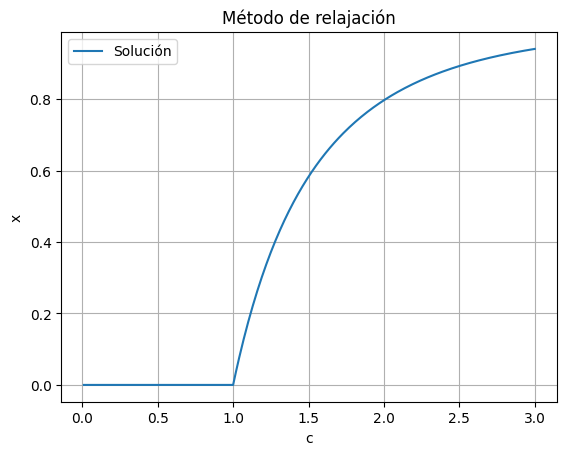

In [6]:
import matplotlib.pyplot as plt
#creamos el intervalo de c

c=np.arange(0.01,3.01,0.01) 

#listas vacías para graficar

C = []
X = []

#iteramos sobre el intervalo de c y calculamos la solución y el error para cada valor de c
for i in c:
    solucion, error = metodo_relajacion(i)
    C.append(solucion) #guardamos la solución
    X.append(error) #guardamos el error

#y graficamos
plt.plot(c, x, label='Solución')
plt.xlabel('c')
plt.ylabel('x')
plt.title('Método de relajación')
plt.legend()
plt.grid()
plt.show()

#### Ejercicio 3

## (b) 
Escribe un programa para resolver la ecuación con una **precisión** $$\varepsilon$$ de:

$$
\varepsilon = 10^{-6}
$$

utilizando el **método de búsqueda binaria**.  

A partir de este método, encuentra un valor para la **constante de desplazamiento**.

In [ ]:
import numpy as np  

def funcion(x):  
    return 5 * np.exp(-x) + x - 5  

def busqueda_binaria(funcion, inicio, fin, tolerancia=1e-6):  
    if funcion(inicio) * funcion(fin) >= 0:  #verifica si la función cambia de signo en el intervalo
        raise ValueError("la función no cambia de signo en el intervalo dado")  

    while (fin - inicio) / 2 > tolerancia:  
        punto_medio = (inicio + fin) / 2  #calcula el punto medio  
        if funcion(punto_medio) == 0:  #si la funcion vale cero,se encuentra la raíz  
            return punto_medio  
        elif funcion(inicio) * funcion(punto_medio) < 0:  #busca la raíz entre inicio punto medio  
            fin = punto_medio  #mueve el final al punto medio  
        else:  
            inicio = punto_medio  #mueve el inicio al punto medio  

    return (inicio + fin) / 2  #retorna el valor aproximado de la raíz  

#llamamos a la función de búsqueda binaria con la función y el intervalo [4, 7]
raiz_aprox = busqueda_binaria(funcion, 4, 7)  
print(f"La raíz aproximada de 5e^(-x)+x-5: ", raiz_aprox)  

La raíz aproximada de 5e^(-x) + x - 5 con un error menor o igual a 1 × 10⁻⁶ es:  4.965113878250122


In [2]:
#para calcular la constante de Wien, definimos constantes
h = 6.62607015e-34  #J·s 
c = 299792458  #m/s  
k_B = 1.380649e-23  #J/K

b = (h * c) / (k_B * raiz_aprox)  
print("La constante de desplazamiento de Wien b es igual a :", b, "m·K")  

La constante de desplazamiento de Wien b es igual a : 0.0028977721614937223 m·K


## (c)
La **ley de desplazamiento** es la base del método de **pirometría óptica**,  
un método para medir las temperaturas de los objetos observando el **color**  
de la radiación térmica que emiten.  

Este método se utiliza habitualmente para estimar las **temperaturas superficiales**  
de cuerpos astronómicos, como el **Sol**.  

El pico de longitud de onda en la radiación emitida por el Sol cae en:

$$
\lambda = 502 \text{ nm}
$$

A partir de las ecuaciones anteriores y el valor de la **constante de desplazamiento**,  
estima la **temperatura de la superficie del Sol**.

In [3]:
longitud_onda_sol = 502e-9  #m  
temperatura_sol = b / longitud_onda_sol   

print("La temperatura de la superficie del Sol con b =", b, "es aproximadamente T =", temperatura_sol, "K")  

La temperatura de la superficie del Sol con b = 0.0028977721614937223 es aproximadamente T = 5772.454504967574 K


#### Ejercicio 2

## (b) 
Demuestra que las ecuaciones se pueden reorganizar de la siguiente manera:

$$
x = y(a + x^2)
$$

$$
y = \frac{b}{a + x^2}
$$

Escribe un programa para resolver estas ecuaciones utilizando el **método de relajación**  
con los valores de **\( a = 1 \) y \( b = 2 \)**.  

Deberías encontrar que el método **no logra converger** a una solución para este caso.

No converge después de 50 iteraciones.


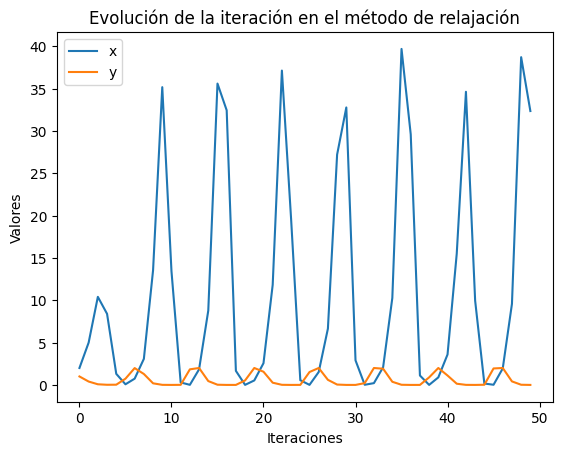

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#definimos las constantes
a = 1
b = 2

#definimos los valores iniciales y parámetros del método de relajación
x = 1.0  # Valor inicial de x
y = 1.0  # Valor inicial de y
tol = 1e-6  #que tan cerca queremos estar de la solución
max_iter = 50  #número máximo de iteraciones

#adicionalmente queremos graficar la iteración para ver porqué no converge
x_vals = []
y_vals = []

#volvemos a definir el método para que se adapte a nuestro nuevo sistema
def relajacion(x, y, a, b, max_iter, tol):
    for _ in range(max_iter):
        x_nuevo = y * (a + x**2)
        y_nuevo = b / (a + x**2)

        x_vals.append(x_nuevo)
        y_vals.append(y_nuevo)
        
        #si nos acercamos a la solución, salimos del bucle
        if abs(x_nuevo - x) < tol and abs(y_nuevo - y) < tol:
            print(f"Converge a x = {x_nuevo}, y = {y_nuevo}")
            break

        x, y = x_nuevo, y_nuevo
    else:
        print("No converge después de", max_iter, "iteraciones.")

#y graficamos la evolución de la iteración
relajacion(x, y, a, b, max_iter, tol)
plt.plot(x_vals, label="x")
plt.plot(y_vals, label="y")
plt.xlabel("Iteraciones")
plt.ylabel("Valores")
plt.legend()
plt.title("Evolución de la iteración en el método de relajación")
plt.show()

vemos que no converge porque la solución oscila. Ahora veamos que si el sistema está reorganizado como se propuso en el inciso c, si converge

Converge a x = 1.9999997202353632, y = 0.40000008952469757


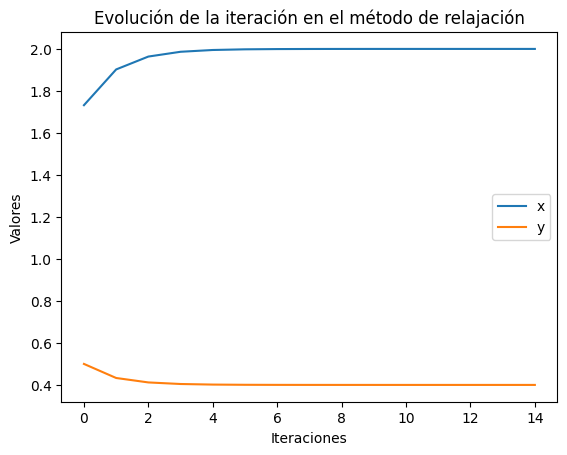

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#reinicializamos los valores iniciales y parámetros del método de relajación
x = 1.0  # Valor inicial de x
y = 1.0  # Valor inicial de y
x_vals = []
y_vals = []

def relajacion2(x, y, a, b, max_iter=50, tol=1e-6):

    for _ in range(max_iter):
        y_nuevo = x / (a + x**2)
        x_nuevo = np.sqrt((b / y_nuevo)-a)

        x_vals.append(x_nuevo)
        y_vals.append(y_nuevo)
        
        # Criterio de parada
        if abs(x_nuevo - x) < tol and abs(y_nuevo - y) < tol:
            print(f"Converge a x = {x_nuevo}, y = {y_nuevo}")
            break

        x, y = x_nuevo, y_nuevo
    else:
        print("No converge después de ", max_iter, "iteraciones.")

    return x, y  # Devuelve el último valor calculado

#y graficamos la evolución de la iteración
relajacion2(x, y, a=1, b=2)
plt.plot(x_vals, label="x")
plt.plot(y_vals, label="y")
plt.xlabel("Iteraciones")
plt.ylabel("Valores")
plt.legend()
plt.title("Evolución de la iteración en el método de relajación")
plt.show()
